### Name : Jeyadev K
### Reg No : 21MID0072
### Course Code : CSI-3004
### Slot : L45 + L46

# Assignment 4 - Twitter US Airline Sentimental Analysis Using Naive Bayes Classifier 

### (1) Importing the Libraries 

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt    

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### (ii) Loading Dataset

In [2]:
airline=pd.read_csv('Tweets_Airline.csv')
airline 

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [3]:
use_cols = ['airline_sentiment', 'text', 'airline']
airline_dataset = pd.read_csv('Tweets_Airline.csv',usecols = use_cols)
airline_dataset

,airline_sentiment,airline,text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...
...,...,...,...
14635,positive,American,@AmericanAir thank you we got on a different f...
14636,negative,American,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,American,@AmericanAir Please bring American Airlines to...
14638,negative,American,"@AmericanAir you have my money, you change my ..."


In [4]:
airline_dataset.head(10)

,airline_sentiment,airline,text
0,neutral,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,Virgin America,@VirginAmerica plus you've added commercials t...
2,neutral,Virgin America,@VirginAmerica I didn't today... Must mean I n...
3,negative,Virgin America,@VirginAmerica it's really aggressive to blast...
4,negative,Virgin America,@VirginAmerica and it's a really big bad thing...
5,negative,Virgin America,@VirginAmerica seriously would pay $30 a fligh...
6,positive,Virgin America,"@VirginAmerica yes, nearly every time I fly VX..."
7,neutral,Virgin America,@VirginAmerica Really missed a prime opportuni...
8,positive,Virgin America,"@virginamerica Well, I didn't…but NOW I DO! :-D"
9,positive,Virgin America,"@VirginAmerica it was amazing, and arrived an ..."


In [5]:
airline_dataset.shape

(14640, 3)

### (iii) Processing the Text

In [6]:
stop_words = stopwords.words('english')
airline_dataset['text_without_stopwords'] = airline_dataset['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
countVect = CountVectorizer(min_df= 10)
binaryVector = countVect.fit_transform(airline_dataset.text_without_stopwords)

### (iv) Seperating Features and Target 

In [7]:
y = airline_dataset.airline_sentiment
x = binaryVector
print(y)
print(x)

0         neutral
1        positive
2         neutral
3        negative
4        negative
           ...   
14635    positive
14636    negative
14637     neutral
14638    negative
14639     neutral
Name: airline_sentiment, Length: 14640, dtype: object
  (0, 1763)	1
  (0, 1805)	1
  (0, 1425)	1
  (1, 1763)	1
  (1, 1268)	1
  (1, 87)	1
  (1, 607)	1
  (2, 1763)	1
  (2, 1658)	1
  (2, 1109)	1
  (2, 1041)	1
  (2, 1118)	1
  (2, 1598)	1
  (2, 144)	1
  (2, 1688)	1
  (3, 1763)	1
  (3, 1341)	1
  (3, 574)	1
  (3, 136)	1
  (3, 981)	1
  (4, 1763)	1
  (4, 1341)	1
  (4, 243)	1
  (4, 213)	1
  (4, 1629)	1
  :	:
  (14637, 267)	1
  (14637, 132)	1
  (14637, 131)	1
  (14638, 674)	1
  (14638, 325)	1
  (14638, 149)	1
  (14638, 145)	1
  (14638, 1094)	1
  (14638, 132)	1
  (14638, 1022)	1
  (14638, 1241)	1
  (14638, 1575)	1
  (14639, 1118)	1
  (14639, 674)	2
  (14639, 1445)	1
  (14639, 925)	1
  (14639, 1126)	2
  (14639, 1269)	1
  (14639, 1743)	1
  (14639, 1228)	1
  (14639, 1029)	1
  (14639, 1548)	1
  (14639, 132)	

### (v) Train Test Spliting 

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=123)
print([x.shape for x in [x_train, x_test, y_train, y_test]])

[(10980, 1872), (3660, 1872), (10980,), (3660,)]


In [9]:
print(x_train)

  (0, 809)	1
  (0, 843)	1
  (0, 816)	1
  (0, 1240)	1
  (0, 1743)	1
  (0, 458)	1
  (0, 1354)	1
  (0, 200)	1
  (0, 1825)	1
  (0, 1746)	1
  (0, 1719)	1
  (0, 1518)	1
  (1, 1864)	1
  (1, 1131)	1
  (1, 1175)	1
  (1, 528)	1
  (1, 893)	1
  (1, 1645)	1
  (1, 907)	1
  (1, 1521)	1
  (2, 364)	1
  (2, 844)	1
  (2, 907)	1
  (2, 1192)	1
  (2, 672)	1
  :	:
  (10977, 1727)	1
  (10977, 1124)	1
  (10977, 1048)	1
  (10978, 674)	1
  (10978, 1651)	1
  (10978, 1634)	1
  (10978, 665)	1
  (10978, 1756)	1
  (10978, 588)	1
  (10978, 460)	1
  (10978, 1176)	1
  (10978, 785)	1
  (10978, 1453)	1
  (10978, 1746)	1
  (10978, 1787)	1
  (10979, 674)	1
  (10979, 207)	1
  (10979, 740)	2
  (10979, 402)	1
  (10979, 1623)	1
  (10979, 1727)	1
  (10979, 1427)	1
  (10979, 1316)	2
  (10979, 476)	1
  (10979, 1785)	1


### (vi) Testing the Naive Bayes Model

In [10]:
MNB = MultinomialNB()
MNB.fit(x_train, y_train)

# Now, you can use the 'predict' method to make predictions on new data.
# Pass the new data as a parameter to the 'predict' method.

predicted = MNB.predict(x_test)
print(predicted)

['negative' 'negative' 'negative' ... 'negative' 'neutral' 'positive']


### (vii) Ploting 

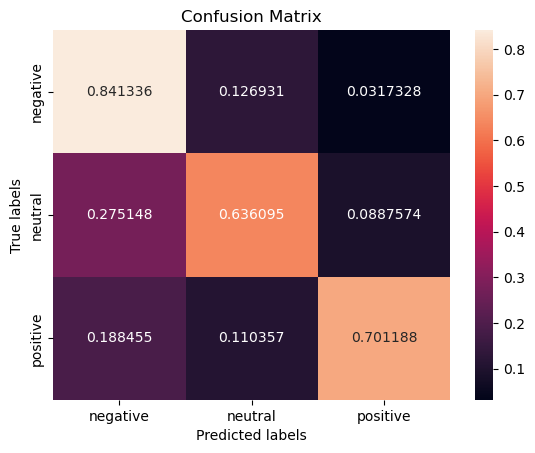

In [11]:
# Lets plot the results properly

confusion = metrics.confusion_matrix(predicted, y_test , normalize = 'true')

ax= plt.subplot()
sns.heatmap(confusion, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['negative', 'neutral', 'positive']); ax.yaxis.set_ticklabels(['negative', 'neutral', 'positive']);

### (viii) Look for the most important words

In [12]:
neg_class_prob_sorted = MNB.feature_log_prob_[0, :].argsort()[::-1]
pos_class_prob_sorted = MNB.feature_log_prob_[1, :].argsort()[::-1]
feature_names = countVect.get_feature_names_out()

print('Negative words:\n', np.take(feature_names, neg_class_prob_sorted[:25]))
print('\nPositive words:\n', np.take(feature_names, pos_class_prob_sorted[:25]))

Negative words:
 ['united' 'flight' 'usairways' 'americanair' 'southwestair' 'jetblue'
 'get' 'cancelled' 'service' 'hours' 'hold' 'can' 'customer' 'help' 'time'
 'plane' 'amp' 'delayed' 'still' 'you' 'us' 'co' 'one' 'call' 'http']

Positive words:
 ['jetblue' 'united' 'southwestair' 'flight' 'co' 'http' 'americanair'
 'usairways' 'get' 'please' 'flights' 'virginamerica' 'need' 'thanks'
 'help' 'can' 'dm' 'would' 'know' 'it' 'our' 'fleek' 'fleet' 'us' 'you']


In [13]:
#These words show a number of airline names so lets compare this with the positive / negative associations for each airline.

bar = airline_dataset.pivot_table(index=['airline'], columns='airline_sentiment', aggfunc='size', fill_value=0)
bar

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


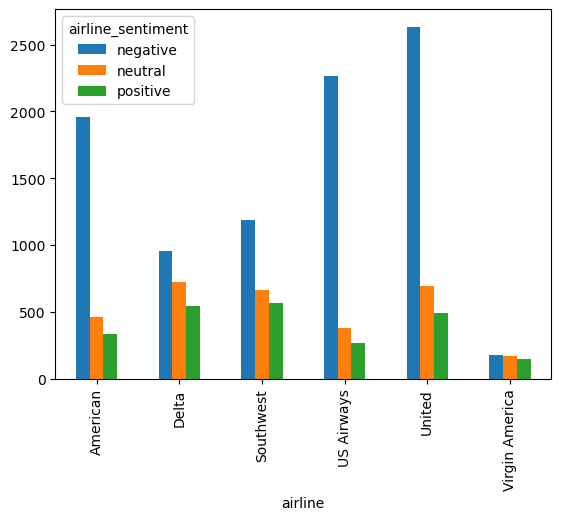

In [14]:
bar.plot(kind='bar')
plt.show()

### (ix) Model Evaluation

In [15]:
accuracy_score = metrics.accuracy_score(predicted, y_test)
confusion_count = metrics.confusion_matrix(predicted, y_test)

print('Accuracy: ',accuracy_score,'\n')
print('Confusion Matrix:\n',confusion_count)

Accuracy:  0.7808743169398907 

Confusion Matrix:
 [[2015  304   76]
 [ 186  430   60]
 [ 111   65  413]]
